C:\Users\iann_\AppData\Local\Temp\ipykernel_22912\521365746.py:5: DtypeWarning: Columns (15,53,61,62,63,66,93,120,122,148,167,171,175,176,178,185) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('dados.csv', sep=';')


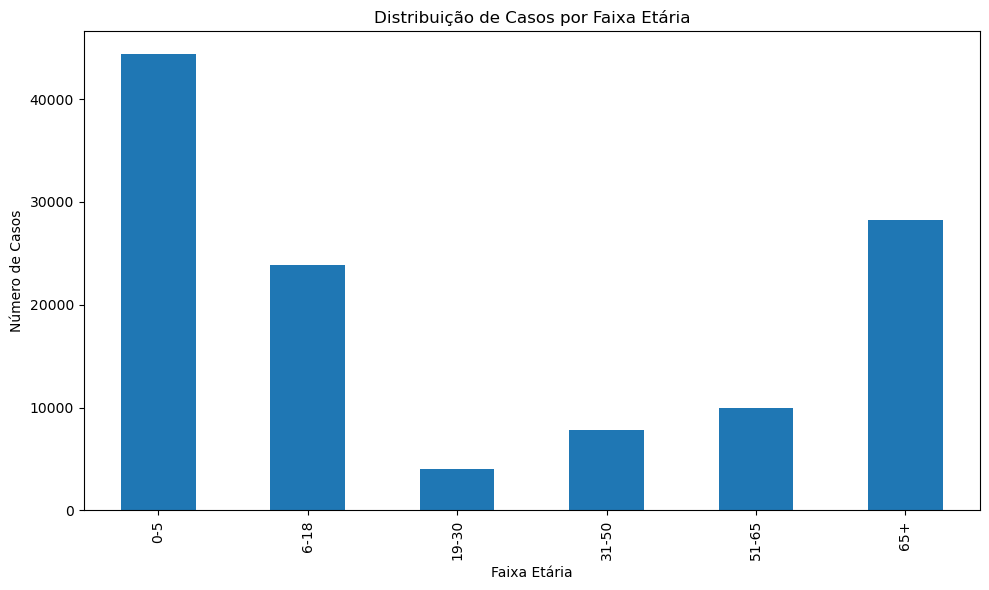

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('dados.csv', sep=';')
df['FAIXA_ETARIA'] = pd.cut(df['NU_IDADE_N'], bins=[0, 5, 18, 30, 50, 65, 100], labels=['0-5', '6-18', '19-30', '31-50', '51-65', '65+'])

# Distribuição de casos por faixa etária
plt.figure(figsize=(10, 6))
df['FAIXA_ETARIA'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribuição de Casos por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Casos')
plt.tight_layout()
plt.show()

Gráfico de contagem de valores salvo como contagem_valores.png


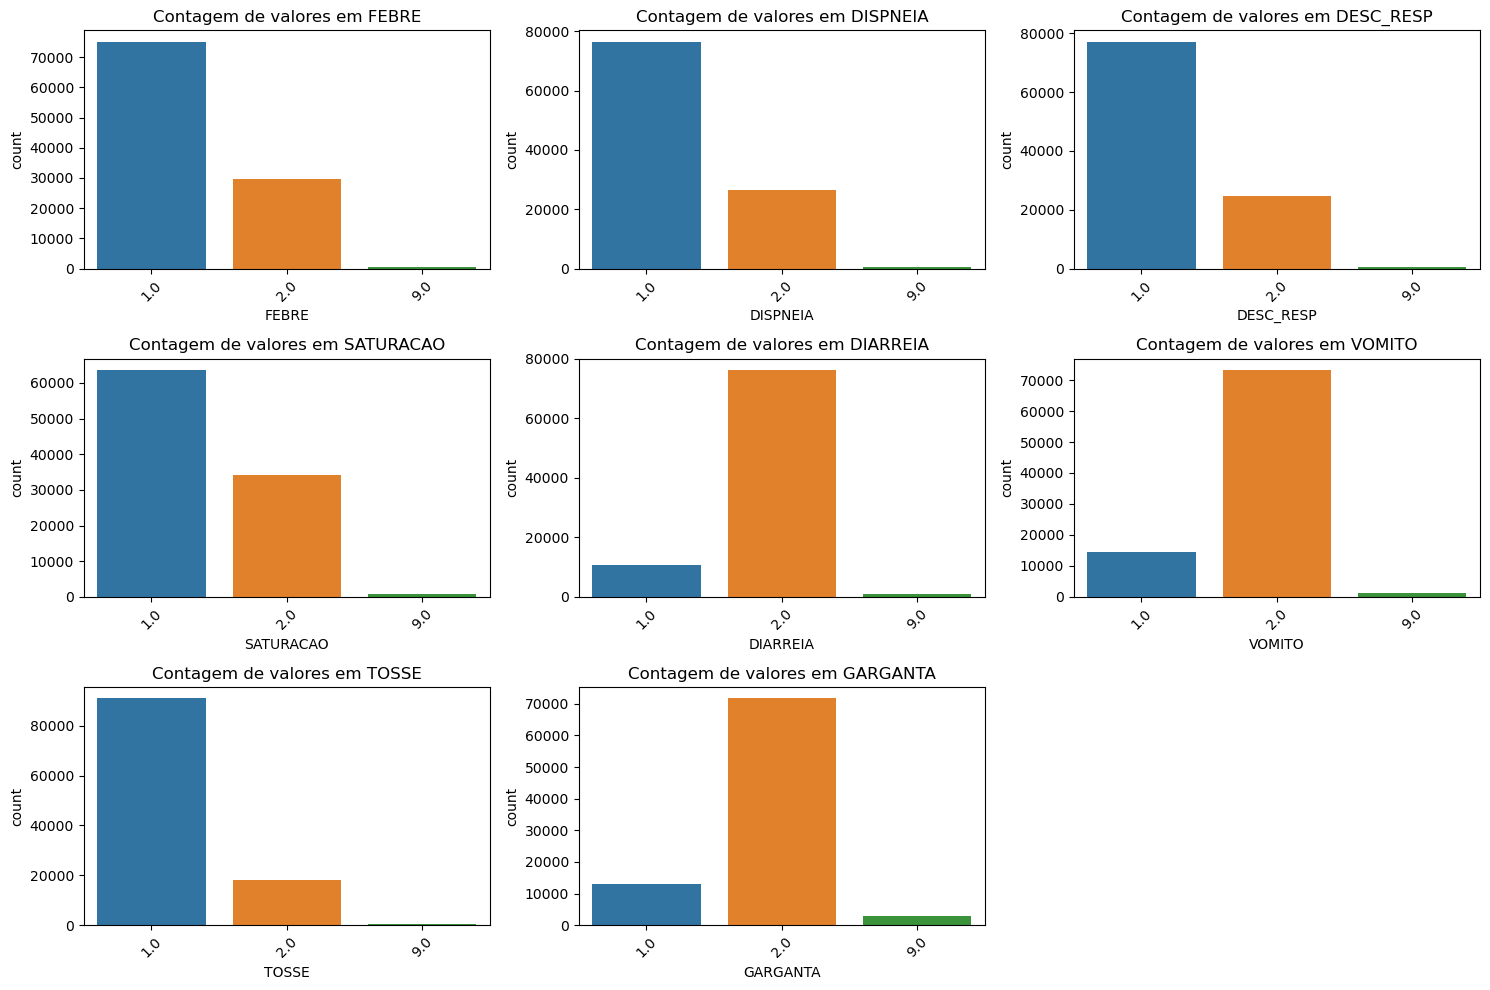

In [38]:
# Criando um gráfico de contagem para cada coluna de sintomas
plt.figure(figsize=(15, 10))
for i, coluna in enumerate(colunas_alvo, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=coluna)
    plt.title(f'Contagem de valores em {coluna}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('contagem_valores.png')

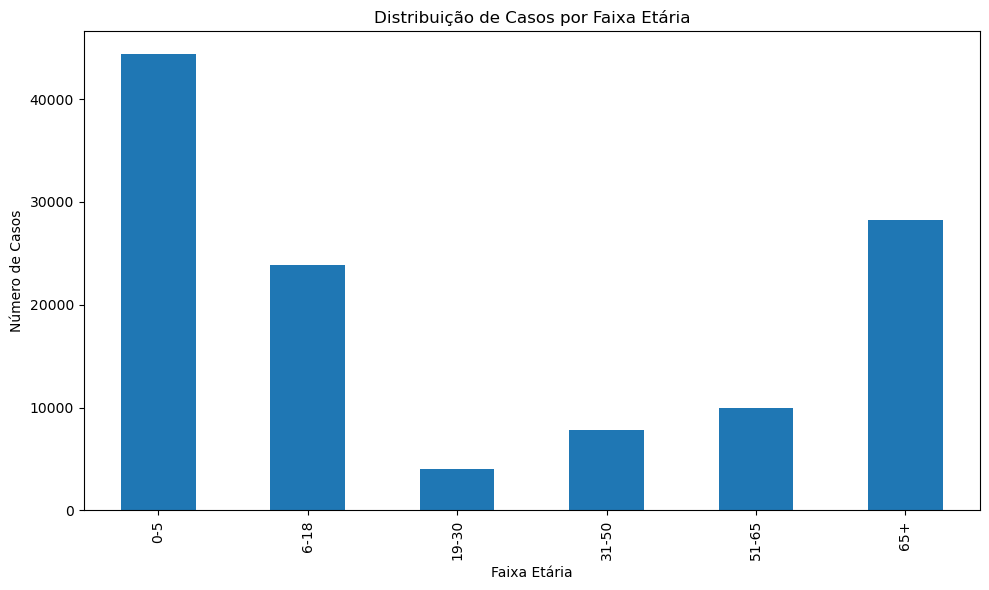

In [44]:
df['FAIXA_ETARIA'] = pd.cut(df['NU_IDADE_N'], bins=[0, 5, 18, 30, 50, 65, 100], labels=['0-5', '6-18', '19-30', '31-50', '51-65', '65+'])

# Distribuição de casos por faixa etária
plt.figure(figsize=(10, 6))
df['FAIXA_ETARIA'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribuição de Casos por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Casos')
plt.tight_layout()
plt.show()

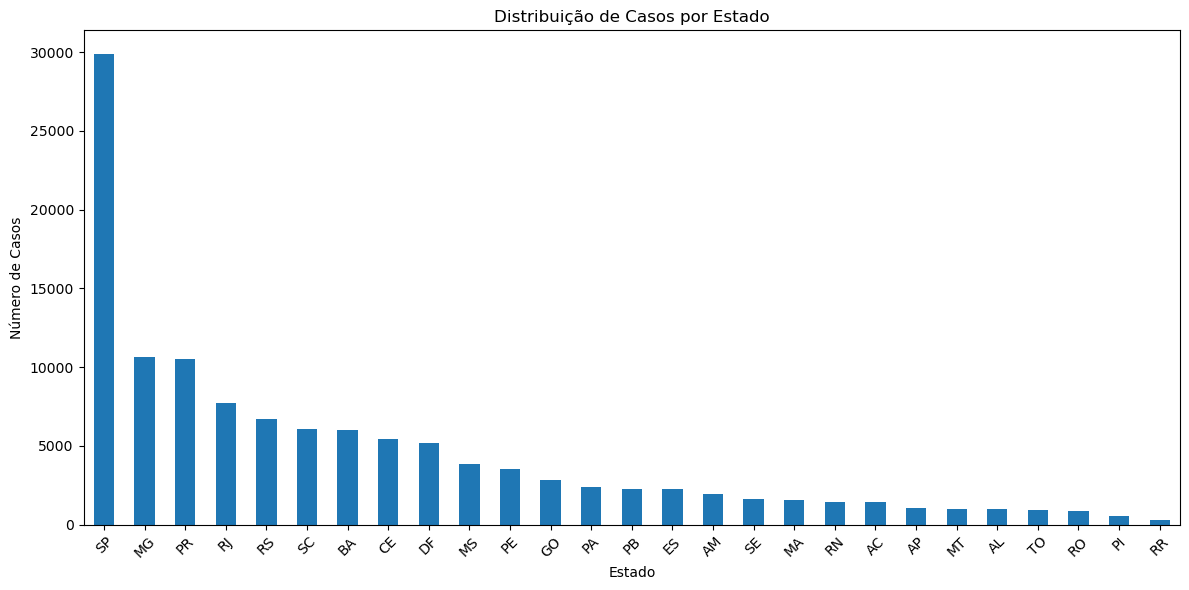

In [47]:
# Distribuição geográfica dos casos
casos_por_estado = df['SG_UF_NOT'].value_counts()

plt.figure(figsize=(12, 6))
casos_por_estado.plot(kind='bar')
plt.title('Distribuição de Casos por Estado')
plt.xlabel('Estado')
plt.ylabel('Número de Casos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Taxa de Letalidade nos Estados Mais Afetados:
           Óbitos  Total de Casos  Taxa de Letalidade
SG_UF_NOT                                            
RJ            901            7745           11.633312
RS            592            6696            8.841099
SP           2450           29894            8.195625
MG            843           10665            7.904360
PR            678           10530            6.438746


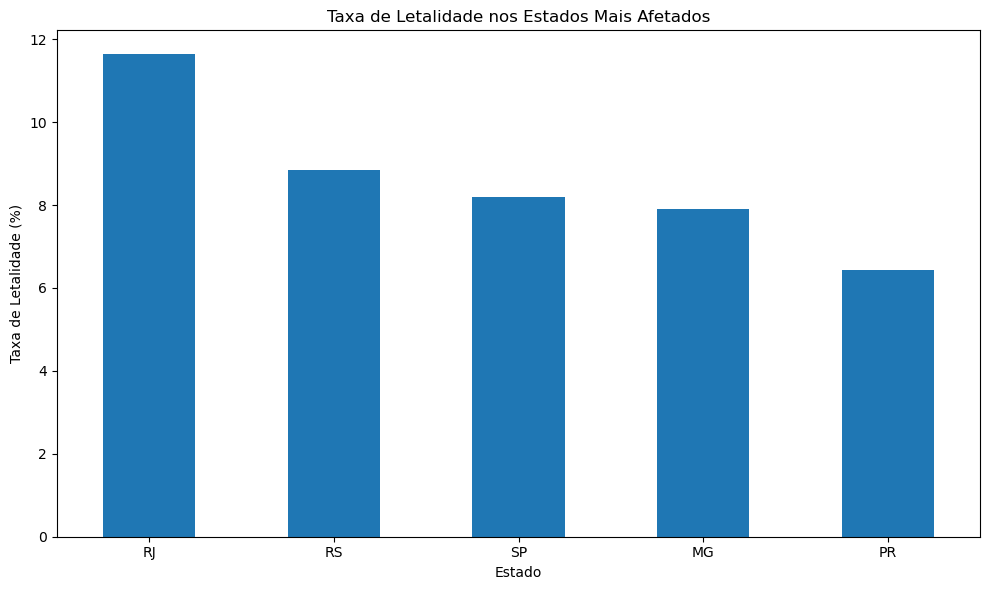

In [48]:
# Definir os estados mais afetados
estados_mais_afetados = ['SP', 'MG', 'PR', 'RJ', 'RS']

# Calcular a taxa de letalidade para cada estado
letalidade = df[df['SG_UF_NOT'].isin(estados_mais_afetados)].groupby('SG_UF_NOT').agg({
    'EVOLUCAO': lambda x: (x == 2).sum(),  # 2 representa óbito
    'SG_UF_NOT': 'count'
}).rename(columns={'EVOLUCAO': 'Óbitos', 'SG_UF_NOT': 'Total de Casos'})

letalidade['Taxa de Letalidade'] = (letalidade['Óbitos'] / letalidade['Total de Casos']) * 100

# Ordenar por taxa de letalidade
letalidade = letalidade.sort_values('Taxa de Letalidade', ascending=False)

print('Taxa de Letalidade nos Estados Mais Afetados:')
print(letalidade)

# Criar gráfico de barras
plt.figure(figsize=(10, 6))
letalidade['Taxa de Letalidade'].plot(kind='bar')
plt.title('Taxa de Letalidade nos Estados Mais Afetados')
plt.xlabel('Estado')
plt.ylabel('Taxa de Letalidade (%)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()